## Assignment 4 158739

#### Student name: Thomas O'Connor
#### Student ID: 05065275

## Introduction

### Income for Industry

We love some income for industry as data people. Lot of news lately has been about productivity, wages, and lost opportunities for future New Zealanders from crazy high taxes chasing away investment dollars. Did you know... our taxes are now at 34% of GDP... that is high. Very high. In 2017 we were only being relieved of 28% of our economy. That is still crazy high. In my first reference there is a paper that outlines the most we can take out of the economy for tax without it having negative effects like job losses, lack of growth and so on. The figure in the study is 15%. We are taking out 34%!!!! I never thought I would ever be an old codger moaning about the government and taxes but it is 2024, and I'm 37 years old, been in the Infantry for 18 years which makes me 46.8 in normal human years if we take each year spent in the Infantry as 1.6 normal person years. So I feel I'm old enough to moan about this sort of thing. 

Anyway, I am looking at a website called figure.nz. It has lots of really nice data, nice and neat to look at and it allows data scraping. This is getting harder and harder if you are not google (which I am clearly not) as businesses are getting more and more concered about webscraping and what people are using their data for. A really cool data scraping exercise was when a guy scraped realestate.co.nz to find out what the real estate agents/vendors wanted for their properties and published on his own website/app. This has obvious implications for the agent and vendor. So much so, that the Privacy Commisssion told the industry to protect its customers. 

Below is a scrape of figure.nz. I have used figure.nz in another assignment two years ago, however I have not used the same page or the same data. I used the code from lectures and some that I have referenced to create this scrape. 

Why look at data about salaries when I'm thinking about taxes? Well, the US has an effective tax rate of 15%. Now that's not the only reason why they are much more sucessful country, but it I for one would rather put my retirement money into the US economy where theres less corporate tax, less requirement for larger margins to pay for the return on equity for investors, and therefore more investment creating more jobs, creating more value. I'm going to compare some wages, in the NZ economy and the US economy. And maybe find some crazy stuff out on the way. 

### Datasets used:

Some New Zealand Incomes by Industries. These are salaries and rather clean data. 

An API from a job website in the USA. This data is fairly nice, it has top and bottom expected salaries. 

OECD Tax Data. This was from the OECD website that allowed me to download a .csv file which I fed into a dataframe. Lots of data here. 

### Dataset sources:

https://figure.nz/chart/hdNat68mEUPexBqH

https://developer.adzuna.com/docs/search

https://stats.oecd.org/Index.aspx?DataSetCode=REV#

### Research Questions

How does tax affect jobs in the USA and NZ?

Can we see better pay in NZ or the US?

Does NZ have a good mix of jobs accross sectors?

### Executive Summary

USA Federal Taxes are low - around the 12% mark. However with the rest of their taxes taken out, they sit at around 26-27%. They do have lower taxes than New Zealand, and it is likely that that along with many other positive factors help their job market out. 

The pay in the USA for similar industries is a lot more than in New Zealand. 

NZ seems to have an ok mix of jobs across the sectors. 

# Data Aquisition

In [3]:
!export PATH=/Library/TeX/texbin:$PATH

'export' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import requests                 
from bs4 import BeautifulSoup   
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import json
import lxml
from time import sleep
from datetime import datetime
import requests
from pywaffle import Waffle
import seaborn as sns

In [14]:
from pylab import rcParams

rcParams['figure.figsize'] = 20, 20
rcParams['font.size'] = 20
rcParams['axes.facecolor'] = 'white'

## Web Scraping

In [21]:
url = "https://figure.nz/chart/hdNat68mEUPexBqH"
response = requests.get(url) 
response

<Response [200]>

In [22]:
page = response.content

page[:1000]

b'<!DOCTYPE html>\n<html lang="en-nz" class="no-js blueprint-chart" id="endpoint-chart-view" data-csrf-token="06964eb7e3f96b59d38d3a259b1669f5700361aa6707e33fa196a27c89e6313218d5631349f0de8071572ce973c396ce08f913b65e7f7ab3b9efbdaa12e10f6e">\n    <head>\n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge" />\n        <meta name="viewport" content="width=device-width, initial-scale=1.0">\n        <title>Mean personal income in the New Zealand tech sector by qualification - Figure.NZ</title>\n        <link rel="canonical" href="https://figure.nz/chart/hdNat68mEUPexBqH">\n        <link rel="preload" href="/cdn/fonts/FoundersGroteskWeb-Medium.ddaf33b8b386.woff2" as="font" type="font/woff2" crossorigin>\n        <link rel="preload" href="/cdn/fonts/FoundersGroteskWeb-Light.a73e6c8bad29.woff2" as="font" type="font/woff2" crossorigin>\n        <link rel="preload" href="/cdn/fonts/FoundersGroteskCondensedWeb-Medium.79cd34ac72d8.woff2" as="font" type="fon

In [23]:
from urllib.request import urlopen
url = "https://figure.nz/chart/hdNat68mEUPexBqH"

page = urlopen(url)
html = page.read().decode("utf-8")
scraping = BeautifulSoup(html, "html.parser")
scraping

<!DOCTYPE html>

<html class="no-js blueprint-chart" data-csrf-token="072e14bd7356288a546d3529fc976492b0948c651fef3b4c1437e849869e4c3d2b9d36210d7b6ce030d2b5a156ec59382186f3971ef1325f3be7fdb5969036d6" id="endpoint-chart-view" lang="en-nz">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible">
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<title>Mean personal income in the New Zealand tech sector by qualification - Figure.NZ</title>
<link href="https://figure.nz/chart/hdNat68mEUPexBqH" rel="canonical"/>
<link as="font" crossorigin="" href="/cdn/fonts/FoundersGroteskWeb-Medium.ddaf33b8b386.woff2" rel="preload" type="font/woff2"/>
<link as="font" crossorigin="" href="/cdn/fonts/FoundersGroteskWeb-Light.a73e6c8bad29.woff2" rel="preload" type="font/woff2"/>
<link as="font" crossorigin="" href="/cdn/fonts/FoundersGroteskCondensedWeb-Medium.79cd34ac72d8.woff2" rel="preload" type="font/woff2"/>
<link as="font" crossorigin="" href="/cdn/fo

In [24]:
scraping_html_table_EQ = BeautifulSoup(response.content,'lxml')
scraping_html_table_EQ = scraping_html_table_EQ.find_all("table")
df =pd.read_html(str(scraping_html_table_EQ))
incomedf = df[0]
incomedf.columns = ['Sector', 'Highest Qualification', 'NZD Per Annum']
incomedf = incomedf.iloc[:]
incomedf

Sector  \
0                       ICT   
1                       ICT   
2                       ICT   
3                       ICT   
4                       ICT   
5   High-Tech Manufacturing   
6   High-Tech Manufacturing   
7   High-Tech Manufacturing   
8   High-Tech Manufacturing   
9   High-Tech Manufacturing   
10                     Tech   
11                     Tech   
12                     Tech   
13                     Tech   
14                     Tech   
15     Total all industries   
16     Total all industries   
17     Total all industries   
18     Total all industries   
19     Total all industries   

                                Highest Qualification  NZD Per Annum  
0                                    No qualification          62064  
1                               Level 1-4 certificate          72300  
2                               Level 5 and 6 diploma          76727  
3           Bachelor degree and level 7 qualification          68903  
4   Post-graduate, honours degree or higher qualif...          74809  
5                                    No qualification          57188  
6                               Level 1-4 certificate          61441  
7                               Level 5 and 6 diploma          66700  
8           Bachelor degree and level 7 qualification          65559  
9   Post-graduate, honours degree or higher qualif...          66365  
10                                   No qualification          59046  
11                              Level 1-4 certificate          65813  
12                              Level 5 and 6 diploma          71279  
13          Bachelor degree and level 7 qualification          67022  
14  Post-graduate, honours degree or higher qualif...          70408  
15                                   No qualification          51300  
16                              Level 1-4 certificate          57200  
17                              Level 5 and 6 diploma          59500  
18          Bachelor degree and level 7 qualification          59800  
19  Post-graduate, honours degree or higher qualif...          59000

In [12]:
incomedf.dtypes

Sector                   object
Highest Qualification    object
NZD Per Annum             int64
dtype: object

### Industry Jobs in the US

This is was difficult to put together...

This iteration created a weird dataframe that I couldnt use. It has nested/vertical/horizontal lists/dataframes in it that I couldn't figure out how to change. I eventually solved it by putting the data into an excel spreadsheet, changing the strings (which were numbers) to numbers and reentering it as a dataframe from importing an excel file. 

The API was easy to use, however it only has 7 days free use, hence the excel file as being the preferred solution. That and cleaning is quick and easy. I had a little cheer when I finally was able to achieve a nice neat dataframe. 

In [78]:
def get_salaries_by_industry(app_id, app_key, industry, country="us", results_per_page=50, page=1):
    endpoint = f"https://api.adzuna.com/v1/api/jobs/{country}/search/{page}"
    params = {
        'app_id': app_id,
        'app_key': app_key,
        'what': industry,
        'results_per_page': results_per_page
    }
    
    response = requests.get(endpoint, params=params)
    
    if response.status_code == 200:
        return response.json()
    else:
        raise Exception(f"Error: {response.status_code}, {response.text}")

In [79]:
def main():
    app_id = "36678d72"
    app_key = "8d0e7f23d5b04cce4de23161dd4807a1"
    industry = "Software" 
    country = "us"  

    try:
        salary_data = get_salaries_by_industry(app_id, app_key, industry, country)
        
        print(salary_data)
        
        if 'results' in salary_data and isinstance(salary_data['results'], list):
            jobs = salary_data['results']
        else:
            raise ValueError("Unexpected API response structure")
        #here i'm making a bunch of lists to put into a dataframe. 
        #Untidy, but the API wouldn't let me put it straight into a dataframe. 
        job_dicts = [{
            "Job Title": job.get('title'),
            "Location": job.get('location', {}).get('display_name'),
            "Salary Min": job.get('salary_min'),
            "Salary Max": job.get('salary_max'),
            "Company": job.get('company', {}).get('display_name')
        } for job in jobs]
             
        df = pd.DataFrame(job_dicts)
           #This is also a bit of data wrangling that didn't really work as I thought. 
           #It just didn't work it should have, and I think the data may have had a extra figure in there.  
        df['Salary Min'] = pd.to_numeric(df['Salary Min'], errors='coerce')
        df['Salary Max'] = pd.to_numeric(df['Salary Max'], errors='coerce')
        
        print(df)
        
        excel_filename = 'salary_data.xlsx'
        df.to_excel(excel_filename, index=False)
        
        
    except Exception as e:
        print(e)

if __name__ == "__main__":
    main()
    


{'mean': 80048.15, '__CLASS__': 'Adzuna::API::Response::JobSearchResults', 'count': 768854, 'results': [{'salary_min': 91064.38, 'company': {'__CLASS__': 'Adzuna::API::Response::Company', 'display_name': 'OPW'}, 'description': 'OPW/PDQ, Vehicle Wash Solutions (A Dover Company) has an opportunity for a Senior Embedded C++ Software Engineer for Industrial Control and Automation based in De Pere, WI. This position is responsible for defining and developing embedded software and real-time firmware for industry-leading control systems that orchestrate, execute, and monitor the motion and control of car wash equipment and systems. Dover is a diversified global manufacturer with annual revenue of over $8 billion. We deliver …', 'longitude': -88.09926, 'id': '4674321820', 'redirect_url': 'https://www.adzuna.com/land/ad/4674321820?se=Zjr9BgUf7xGVWz0V2kq60Q&utm_medium=api&utm_source=36678d72&v=7FC45037FE4BC8F71B48FDC85B2FE8EE34E000EE', 'adref': 'eyJhbGciOiJIUzI1NiJ9.eyJpIjoiNDY3NDMyMTgyMCIsInMiO

In [27]:
df= pd.read_excel('./salary_data.xlsx')
df

Job Title  \
0                            Senior Software Engineer   
1                                 Software Engineer I   
2                            Staff Software Architect   
3                            Software Test Technician   
4                 Lead Software Engineer - Full Stack   
5         Manager, Software Development & Engineering   
6             Senior Architect, Software Architecture   
7                         Principal Software Engineer   
8                      Sr. Embedded Software Engineer   
9               Software Engineer- Clearance Required   
10                    Sr. Software Engineer (MarTech)   
11        Manager, Software Development & Engineering   
12                             Lead Software Engineer   
13                             Lead Software Engineer   
14   Software Engineer Principal - Clearance Required   
15      Comcast Cybersecurity: IoT Software Developer   
16                             Lead Software Engineer   
17                             Lead Software Engineer   
18   Principal Software Development Engineer - DOCSIS   
19                                 Software Developer   
20                             Lead Software Engineer   
21                             Lead Software Engineer   
22                             Lead Software Engineer   
23                             Lead Software Engineer   
24                             Lead Software Engineer   
25                             Lead Software Engineer   
26                                 Software Developer   
27                             Lead Software Engineer   
28       Senior Software Engineer - Android Developer   
29  Manager of Software Development – Customer Dig...   
30                           IAM Software Engineer II   
31                           Senior Software Engineer   
32                       Software Engineer (Frontend)   
33                             Lead Software Engineer   
34                             Software Engineer Coop   
35  Software Engineer, Senior - GMD Weapons System...   
36  Software Engineer, Senior - GMD Weapons System...   
37  Software Engineer, Senior - GMD Weapons System...   
38  Software Engineer, Senior - GMD Weapons System...   
39  Software Engineer, Senior - GMD Weapons System...   
40  Software Engineer, Senior - GMD Weapons System...   
41  Software Engineer, Senior - GMD Weapons System...   
42  Software Engineer, Senior - GMD Weapons System...   
43  Software Engineer, Senior - GMD Weapons System...   
44  Software Engineer, Senior - GMD Weapons System...   
45  Software Developer, Staff - GMD Weapons System...   
46  Software Developer, Staff - GMD Weapons System...   
47  Software Developer, Staff - GMD Weapons System...   
48  Software Developer, Staff - GMD Weapons System...   
49  Software Developer, Staff - GMD Weapons System...   

                                    Location  Salary Min  Salary Max  \
0                      De Pere, Brown County    91064.38    91064.38   
1              Reading Station, Berks County    73028.40    73028.40   
2              Reading Station, Berks County    85990.89    85990.89   
3                     Keene, Cheshire County    71529.01    71529.01   
4                   Bannockburn, Lake County   184085.84   184085.84   
5                     Reston, Fairfax County    88438.98    88438.98   
6                 Feasterville, Bucks County   108014.34   108014.34   
7                   Bannockburn, Lake County   239122.97   239122.97   
8                      De Pere, Brown County    85819.75    85819.75   
9               Harmans, Anne Arundel County   126843.65   126843.65   
10                Feasterville, Bucks County    84715.71    84715.71   
11  Mount Laurel Township, Burlington County    93664.32    93664.32   
12                    Orlando, Orange County   130141.14   130141.14   
13                     Highland Park, Dallas   125283.05   125283.05   
14              Harmans, Anne Arundel County   143159.62

In [28]:
df.dtypes

Job Title      object
Location       object
Salary Min    float64
Salary Max    float64
Company        object
dtype: object

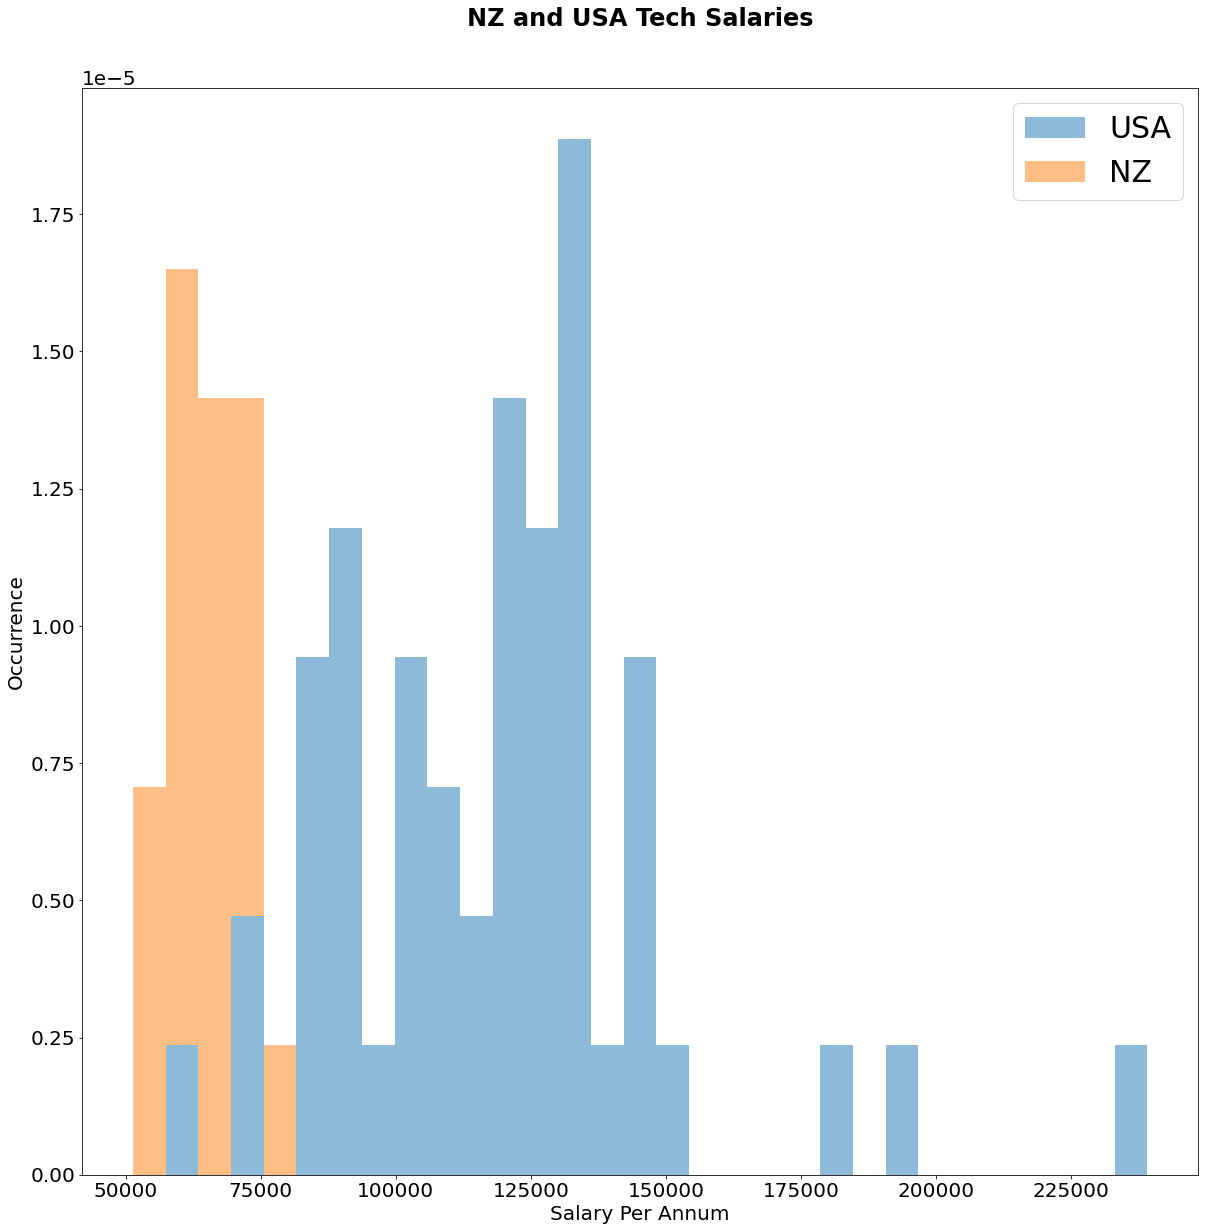

In [43]:

y1=df['Salary Min']
y2=incomedf['NZD Per Annum']
leg=['USA','NZ']
plt.hist([y1, y2], 31, 
         histtype='barstacked', 
         density=True, 
         alpha=0.5,
         edgecolor='none', 
         label=leg)
plt.xlabel('Salary Per Annum')
plt.ylabel('Occurrence')
 
plt.title('NZ and USA Tech Salaries\n\n',
          fontweight = "bold")


plt.legend(prop={'size': 30})


The above graph shows NZ salaries vs USA salaries for similar jobs. The crazy thing is, I haven't converted the dollar to a single dollar type. This is because having lived in both countries and others, the cost of living ends up being relative to what you earn. In other words, everywhere is roughly the same in terms of earning and cost power. 

What is interesting though is that overall the USA salaries are way higher than the New Zealand Salaries. 

Apologies for the lack of labelling, I couldn't get the label maker out of this package. 

## Data Wrangling and EDA

### Data Wrangling
I have already completed some of this, as I have changed the data types in the excel document, tried to do it in the API coding (failed obviously). For the web scraping the data came out nice and neat, so not much was really needed. I now just need to concatenate the dataframes, make some graphs to see what pops out, and call it a day. 

Just kidding! I probably need to verify my claim that the USA has 15% tax. So one more little bit of data and we will have a look into some graphs. 

In [3]:
df_oecdtax = pd.read_csv('./REV_31052024024502071.csv')
df_oecdtax

C:\Users\crump\AppData\Local\Temp\ipykernel_7928\206928844.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_oecdtax = pd.read_csv('./REV_31052024024502071.csv')


GOV Level of government       TAX                Tax revenue  \
0       SUPRA       Supranational  TOTALTAX          Total tax revenue   
1       SUPRA       Supranational  TOTALTAX          Total tax revenue   
2       SUPRA       Supranational  TOTALTAX          Total tax revenue   
3       SUPRA       Supranational  TOTALTAX          Total tax revenue   
4       SUPRA       Supranational  TOTALTAX          Total tax revenue   
...       ...                 ...       ...                        ...   
699688  STATE      State/Regional        AH  Miscellaneous differences   
699689  STATE      State/Regional        AH  Miscellaneous differences   
699690  STATE      State/Regional        AH  Miscellaneous differences   
699691  STATE      State/Regional        AH  Miscellaneous differences   
699692  STATE      State/Regional        AH  Miscellaneous differences   

           VAR                 Indicator  COU   Country   YEA  Year Unit Code  \
0       TAXGDP   Tax revenue as % of GDP  AUT   Austria  1995  1995        PC   
1       TAXGDP   Tax revenue as % of GDP  AUT   Austria  1996  1996        PC   
2       TAXGDP   Tax revenue as % of GDP  AUT   Austria  1997  1997        PC   
3       TAXGDP   Tax revenue as % of GDP  AUT   Austria  1998  1998        PC   
4       TAXGDP   Tax revenue as % of GDP  AUT   Austria  1999  1999        PC   
...        ...                       ...  ...       ...   ...   ...       ...   
699688  TAXUSD  Total tax revenue in USD  SVN  Slovenia  2018  2018       USD   
699689  TAXUSD  Total tax revenue in USD  SVN  Slovenia  2019  2019       USD   
699690  TAXUSD  Total tax revenue in USD  SVN  Slovenia  2020  2020       USD   
699691  TAXUSD  Total tax revenue in USD  SVN  Slovenia  2021  2021       USD   
699692  TAXUSD  Total tax revenue in USD  SVN  Slovenia  2022  2022       USD   

              Unit  PowerCode Code PowerCode  Reference Period Code  \
0       Percentage               0     Units                    NaN   
1       Percentage               0     Units                    NaN   
2       Percentage               0     Units                    NaN   
3       Percentage               0     Units                    NaN   
4       Percentage               0     Units                    NaN   
...            ...             ...       ...                    ...   
699688   US Dollar               9  Billions                    NaN   
699689   US Dollar               9  Billions                    NaN   
699690   US Dollar               9  Billions                    NaN   
699691   US Dollar               9  Billions                    NaN   
699692   US Dollar               9  Billions                    NaN   

        Reference Period  Value  Flag Codes  Flags  
0                    NaN  0.176         NaN    NaN  
1                    NaN  0.206         NaN    NaN  
2                    NaN  0.206         NaN    NaN  
3                    NaN  0.208         NaN    NaN  
4                    NaN  0.180         NaN    NaN  
...                  ...    ...         ...    ...  
699688               NaN  0.000         NaN    NaN  
699689               NaN  0.000         NaN    NaN  
699690               NaN  0.000         NaN    NaN  
699691               NaN  0.000         NaN    NaN  
699692               NaN  0.000         NaN    NaN  

[699693 rows x 19 columns]

### Now we are talking. 

Thats some nice messy data. It was a remarkably easy import, I selected what data I wanted from the OECD website, downloaded the data as a .csv file put it into a dataframe. Time to make sense of it. 

Below is my efforts at understanding the data. First I selected out the rows with the USA and got rid of any values that equal zero. I realise that I included more columns that I didn't need at the time, however it will save me time later when I'm selecting out that data that I want to look at in more detail.

I used a groupby statement to count the number of rows there is in the dataframes. First the raw one, then the dataframe with only the USA selected. There is plenty of datapoints for me to look at. 

In [6]:
df_oecdtax2 = df_oecdtax.loc[(df_oecdtax['Country']=='United States') & 
                             (df_oecdtax['Value'] >= 0) & 
                             (df_oecdtax['Indicator'])& 
                             (df_oecdtax['Level of government']) & 
                             (df_oecdtax['Year'] >= 0), 
                             :]


In [8]:
n_by_country = df_oecdtax.groupby("Level of government")["Country"].count()
n_by_country.head(5)

Level of government
Federal or Central government    172689
Local government                 138301
Social Security Funds             80984
State/Regional                    44107
Supranational                     52156
Name: Country, dtype: int64

In [9]:
n_USA_country = df_oecdtax2.groupby("Level of government")["Country"].count()
n_USA_country.head(5)

Level of government
Federal or Central government    4032
Local government                 3744
Social Security Funds            1764
State/Regional                   4022
Total                            6390
Name: Country, dtype: int64

array([<AxesSubplot:xlabel='Year', ylabel='Value($mil)'>], dtype=object)

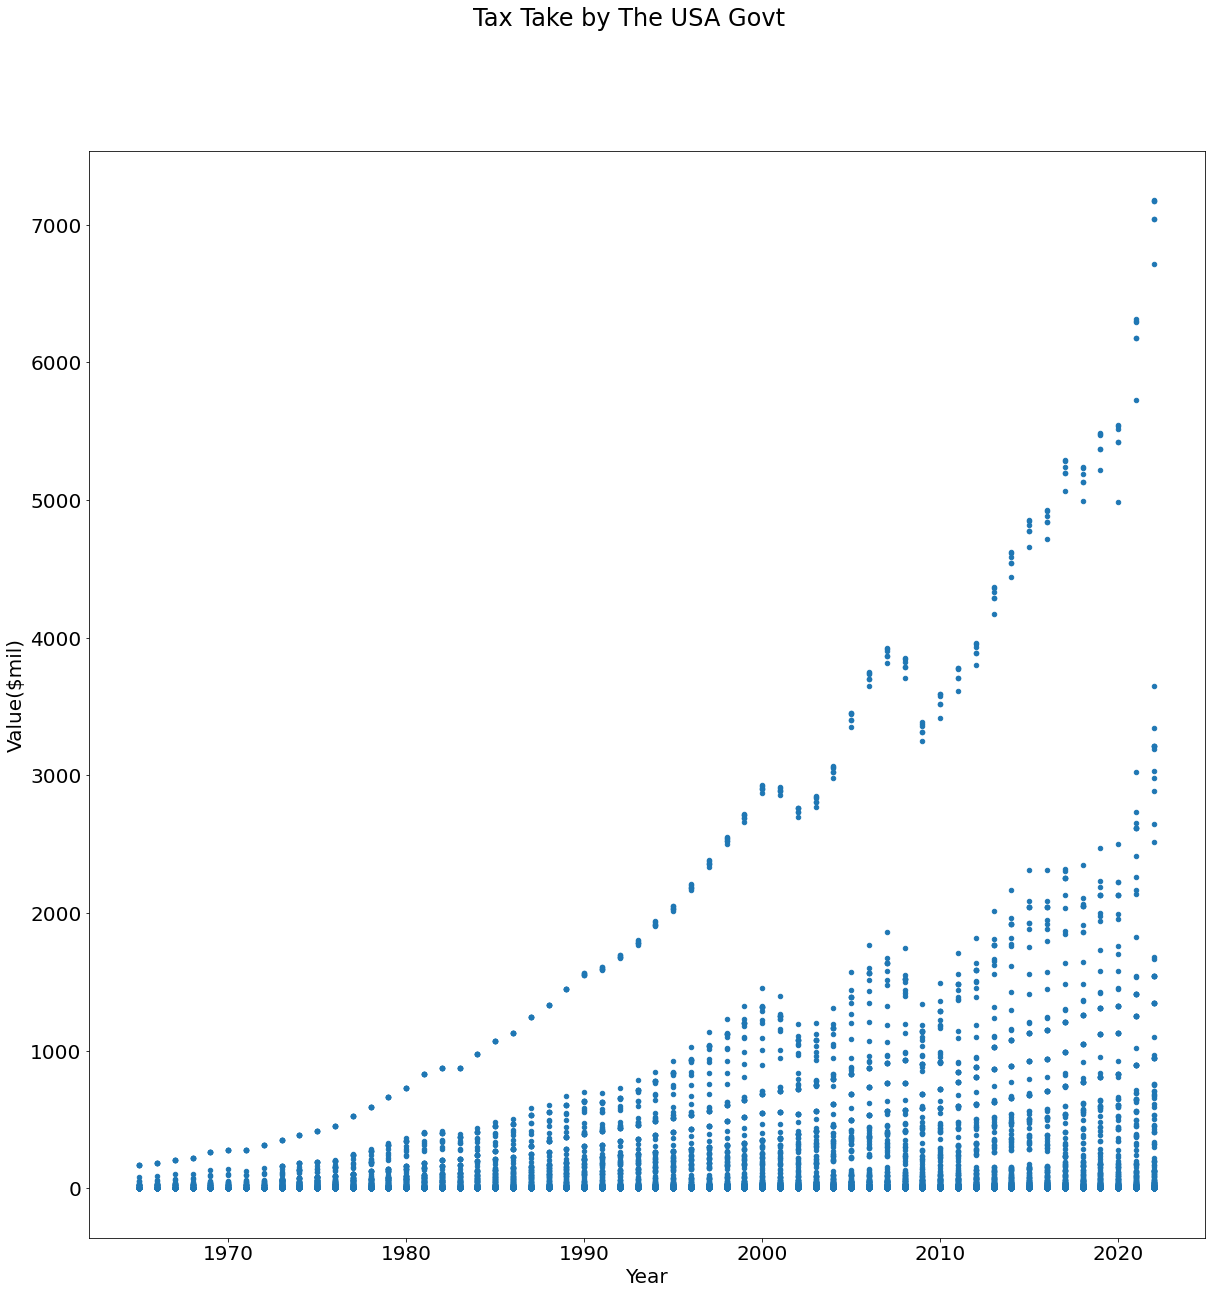

In [32]:
df_oecdtax2.plot(kind="scatter",
                 x = 'Year',
                 y= 'Value', 
                 ylabel='Value($mil)',
                 subplots='Indicator',
                 title='Tax Take by The USA Govt')

This graph shows that the tax take in the USA has exploded over time. Whilst it's not that clear who is taking what, and how much it is compare with growth and so on, it is a start. 

### An Improvement
Lets improve this by dividing the data into colours depending on what or who is taking the tax in the USA. 

Below is a graph that shows me that I could probably get some insights i want by looking at the "Tax Revenue as % of GDP" figures only. I need to separate them out and have a look.

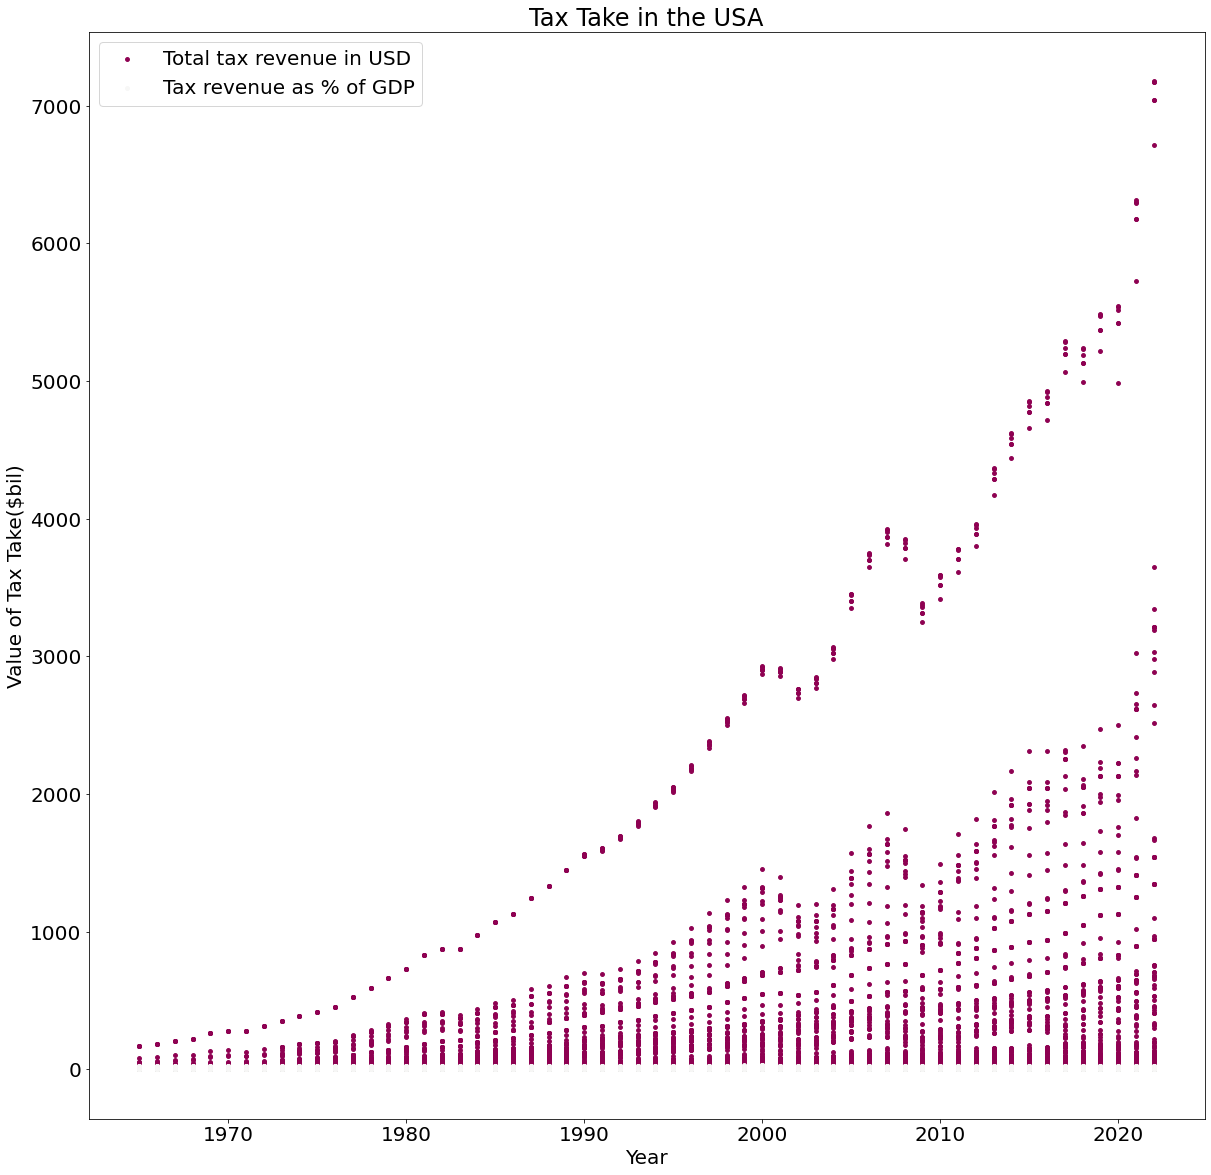

In [121]:
#Scatter of the Dataframe
x=df_oecdtax2['Year']
y=df_oecdtax2['Value']

# Get unique names of what we are plotting
uniq = list(set(df_oecdtax2['Indicator']))

# Set the color map to match the number of Indicators
z = range(1,len(uniq))
hot = plt.get_cmap('PiYG')
cNorm  = colors.Normalize(vmin=0, vmax=len(uniq))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=hot)

# Plot each Indicator
for i in range(len(uniq)):
    indx = df_oecdtax2['Indicator'] == uniq[i]
    plt.scatter(x[indx], y[indx], s=15, color=scalarMap.to_rgba(i), label=uniq[i])

plt.xlabel('Year')
plt.ylabel('Value of Tax Take($bil)')
plt.title('Tax Take in the USA')
plt.legend(loc='upper left')
plt.show()

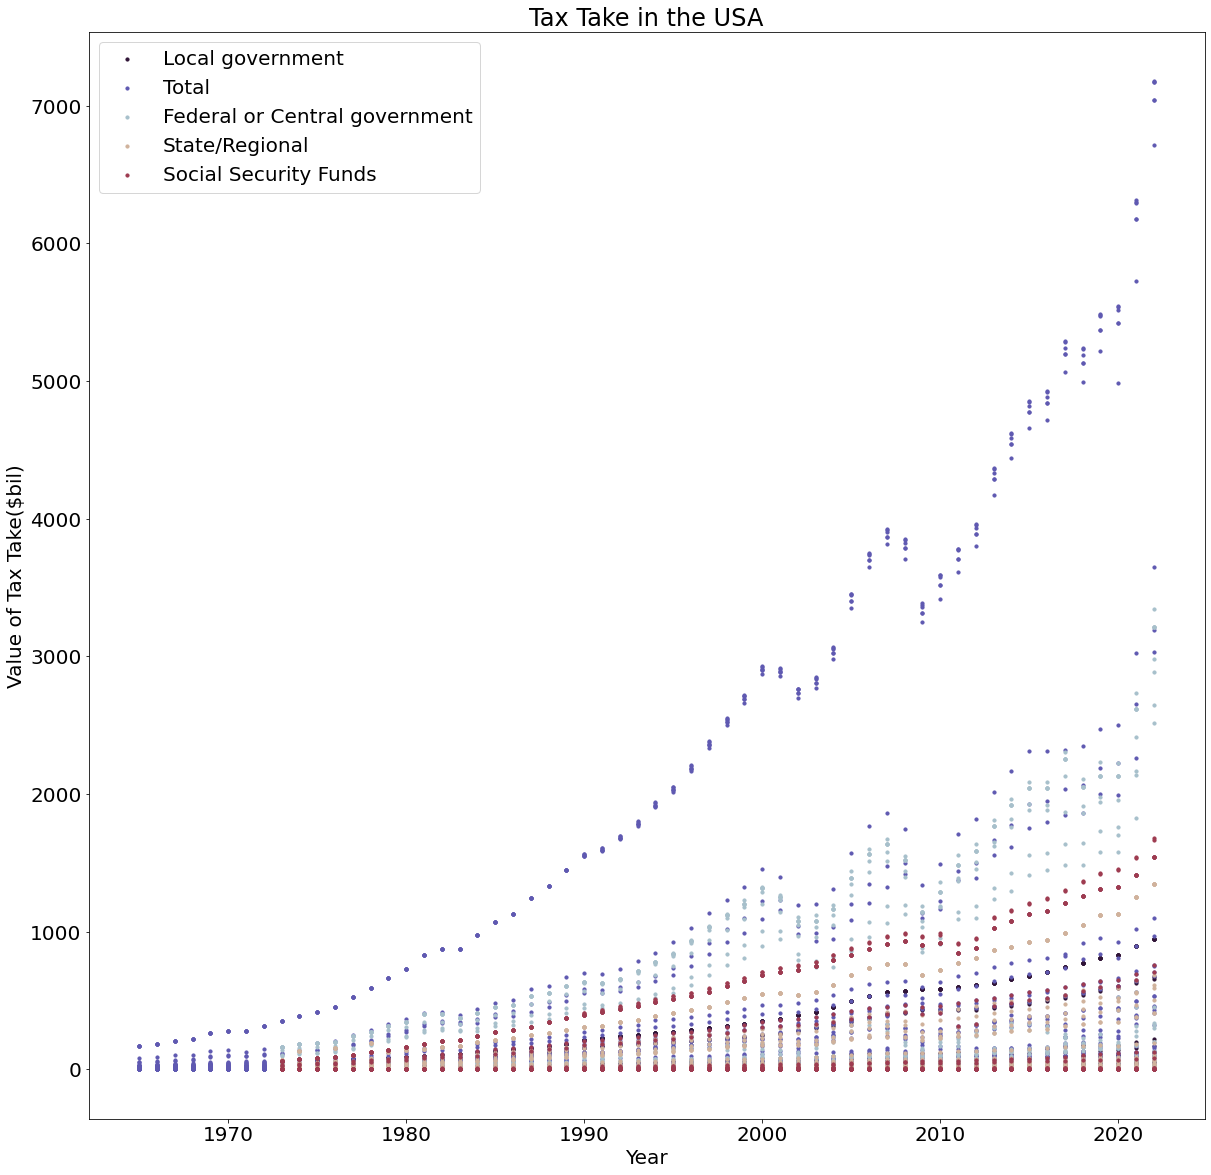

In [48]:
#Scatter graph axis
x=df_oecdtax2['Year']
y=df_oecdtax2['Value']

# Get unique names for the level of Government which is also the legend
uniq = list(set(df_oecdtax2['Level of government']))

# Set the color map to match the number of levels of government
z = range(1,len(uniq))
hot = plt.get_cmap('twilight_shifted')
cNorm  = colors.Normalize(vmin=0, vmax=len(uniq))
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=hot)

# Plot each Level of Government
for i in range(len(uniq)):
    indx = df_oecdtax2['Level of government'] == uniq[i]
    plt.scatter(x[indx], y[indx], s=10, color=scalarMap.to_rgba(i), label=uniq[i])

plt.xlabel('Year')
plt.ylabel('Value of Tax Take($bil)')
plt.title('Tax Take in the USA')
plt.legend(loc='upper left')
plt.show()

This graph is a bit better. It shows who has their hand in the cookie jar taking them tax dollars. Social security is an interesting one. They seen to be taking more and more over time. This is concerning for the USA. Social security over there is in the form of a fund. Everyone pays into it, it gets invested in bonds and all sorts, then the profits pay people that need it. Much like what the Labour Government tried to do with their Unemployment Insurance Scheme, just with more potential claimants, and way bigger. 

OK, this is interesting, but needs context. If we take this data, and put it over GDP then it might tell a sweet story. 

In [34]:
url = "https://www.macrotrends.net/global-metrics/countries/USA/united-states/gdp-gross-domestic-product#:~:text=U.S.%20gdp%20for%202022%20was%20%2425%2C439.70B%2C%20a%209.11%25,2019%20was%20%2421%2C380.98B%2C%20a%204.13%25%20increase%20from%202018."
response = requests.get(url) 
response

<Response [403]>

Above is my attempt to see if I can web scrape some data from macrotrends on USA GDP over the years. It said no, you're not allowed to web scrape my sweet data, so I copy pasted it into an excel spread sheet. 

In [10]:
usgdp_df = pd.read_excel('./usa_gdp.xlsx')
usgdp_df

Year          GDP  Per Capita  Growth
0   2022  $25,439.70B       76330  0.0194
1   2021  $23,315.08B       70219  0.0595
2   2020  $21,060.47B       63529 -0.0277
3   2019  $21,380.98B       65120  0.0229
4   2018  $20,533.06B       62823  0.0295
..   ...          ...         ...     ...
58  1964     $685.80B        3574  0.0580
59  1963     $638.60B        3375  0.0440
60  1962     $605.10B        3244  0.0610
61  1961     $563.30B        3067  0.0230
62  1960     $543.30B        3007  0.0000

[63 rows x 4 columns]

Below is me cleaning up the data. I'm merging it, selecting out the USA data, then removing the strings in the GDP column to then convert to a float. I'm using a float because the data has decimal points. I'm keeping the decimal points becuase I like them. Also they are in billions of dollars, so it is still a fair bit of money. 

In [11]:
oecdtax_usgdp_df = df_oecdtax2.merge(usgdp_df, on='Year')

oecdtax_usgdp_df = oecdtax_usgdp_df.loc[(oecdtax_usgdp_df['Country']=='United States') &
                                  (oecdtax_usgdp_df['Value'] >= 0) & 
                                  (oecdtax_usgdp_df['Level of government']) & 
                                  (oecdtax_usgdp_df['Year'] >= 0) & 
                                  (oecdtax_usgdp_df['Indicator']=='Total tax revenue in USD')&
                                  (oecdtax_usgdp_df['Tax revenue']=='Total tax revenue'), 
                                  :]

#Data Cleaning/Wrangling
oecdtax_usgdp_df['GDP'] = oecdtax_usgdp_df['GDP'].str.replace('$', '').str.replace('B', '').str.replace(',', '').astype(float)
oecdtax_usgdp_df

C:\Users\crump\AppData\Local\Temp\ipykernel_7928\1263312258.py:12: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  oecdtax_usgdp_df['GDP'] = oecdtax_usgdp_df['GDP'].str.replace('$', '').str.replace('B', '').str.replace(',', '').astype(float)


GOV            Level of government       TAX        Tax revenue  \
4         NES                          Total  TOTALTAX  Total tax revenue   
238    SOCSEC          Social Security Funds  TOTALTAX  Total tax revenue   
245     STATE                 State/Regional  TOTALTAX  Total tax revenue   
259       FED  Federal or Central government  TOTALTAX  Total tax revenue   
331     LOCAL               Local government  TOTALTAX  Total tax revenue   
...       ...                            ...       ...                ...   
19412     NES                          Total  TOTALTAX  Total tax revenue   
19520     NES                          Total  TOTALTAX  Total tax revenue   
19628     NES                          Total  TOTALTAX  Total tax revenue   
19736     NES                          Total  TOTALTAX  Total tax revenue   
19844     NES                          Total  TOTALTAX  Total tax revenue   

          VAR                 Indicator  COU        Country   YEA  Year  ...  \
4      TAXUSD  Total tax revenue in USD  USA  United States  1973  1973  ...   
238    TAXUSD  Total tax revenue in USD  USA  United States  1973  1973  ...   
245    TAXUSD  Total tax revenue in USD  USA  United States  1973  1973  ...   
259    TAXUSD  Total tax revenue in USD  USA  United States  1973  1973  ...   
331    TAXUSD  Total tax revenue in USD  USA  United States  1973  1973  ...   
...       ...                       ...  ...            ...   ...   ...  ...   
19412  TAXUSD  Total tax revenue in USD  USA  United States  1968  1968  ...   
19520  TAXUSD  Total tax revenue in USD  USA  United States  1969  1969  ...   
19628  TAXUSD  Total tax revenue in USD  USA  United States  1970  1970  ...   
19736  TAXUSD  Total tax revenue in USD  USA  United States  1971  1971  ...   
19844  TAXUSD  Total tax revenue in USD  USA  United States  1972  1972  ...   

      PowerCode Code PowerCode  Reference Period Code Reference Period  \
4                  9  Billions                    NaN              NaN   
238                9  Billions                    NaN              NaN   
245                9  Billions                    NaN              NaN   
259                9  Billions                    NaN              NaN   
331                9  Billions                    NaN              NaN   
...              ...       ...                    ...              ...   
19412              9  Billions                    NaN              NaN   
19520              9  Billions                    NaN              NaN   
19628              9  Billions                    NaN              NaN   
19736              9  Billions                    NaN              NaN   
19844              9  Billions                    NaN              NaN   

         Value  Flag Codes  Flags      GDP  Per Capita  Growth  
4      348.794         NaN    NaN  1425.38        6726  0.0565  
238     63.404         NaN    NaN  1425.38        6726  0.0565  
245     68.686         NaN    NaN  1425.38        6726  0.0565  
259    163.846         NaN    NaN  1425.38        6726  0.0565  
331     52.858         NaN    NaN  1425.38        6726  0.0565  
...        ...         ...    ...      ...         ...     ...  
19412  218.623         NaN    NaN   942.50        4696  0.0480  
19520  261.468         NaN    NaN  1019.90        5032  0.0310  
19628  276.727         NaN    NaN  1073.30        5234 -0.0028  
19736  278.738         NaN    NaN  1164.85        5609  0.0329  
19844  313.091         NaN    NaN  1279.11        6094  0.0526  

[258 rows x 22 columns]

In [12]:
#Also data cleaning and wrangling
oecdtax_usgdp_df['Flag Codes'].fillna(value=0)

4        0.0
238      0.0
245      0.0
259      0.0
331      0.0
        ... 
19412    0.0
19520    0.0
19628    0.0
19736    0.0
19844    0.0
Name: Flag Codes, Length: 258, dtype: float64

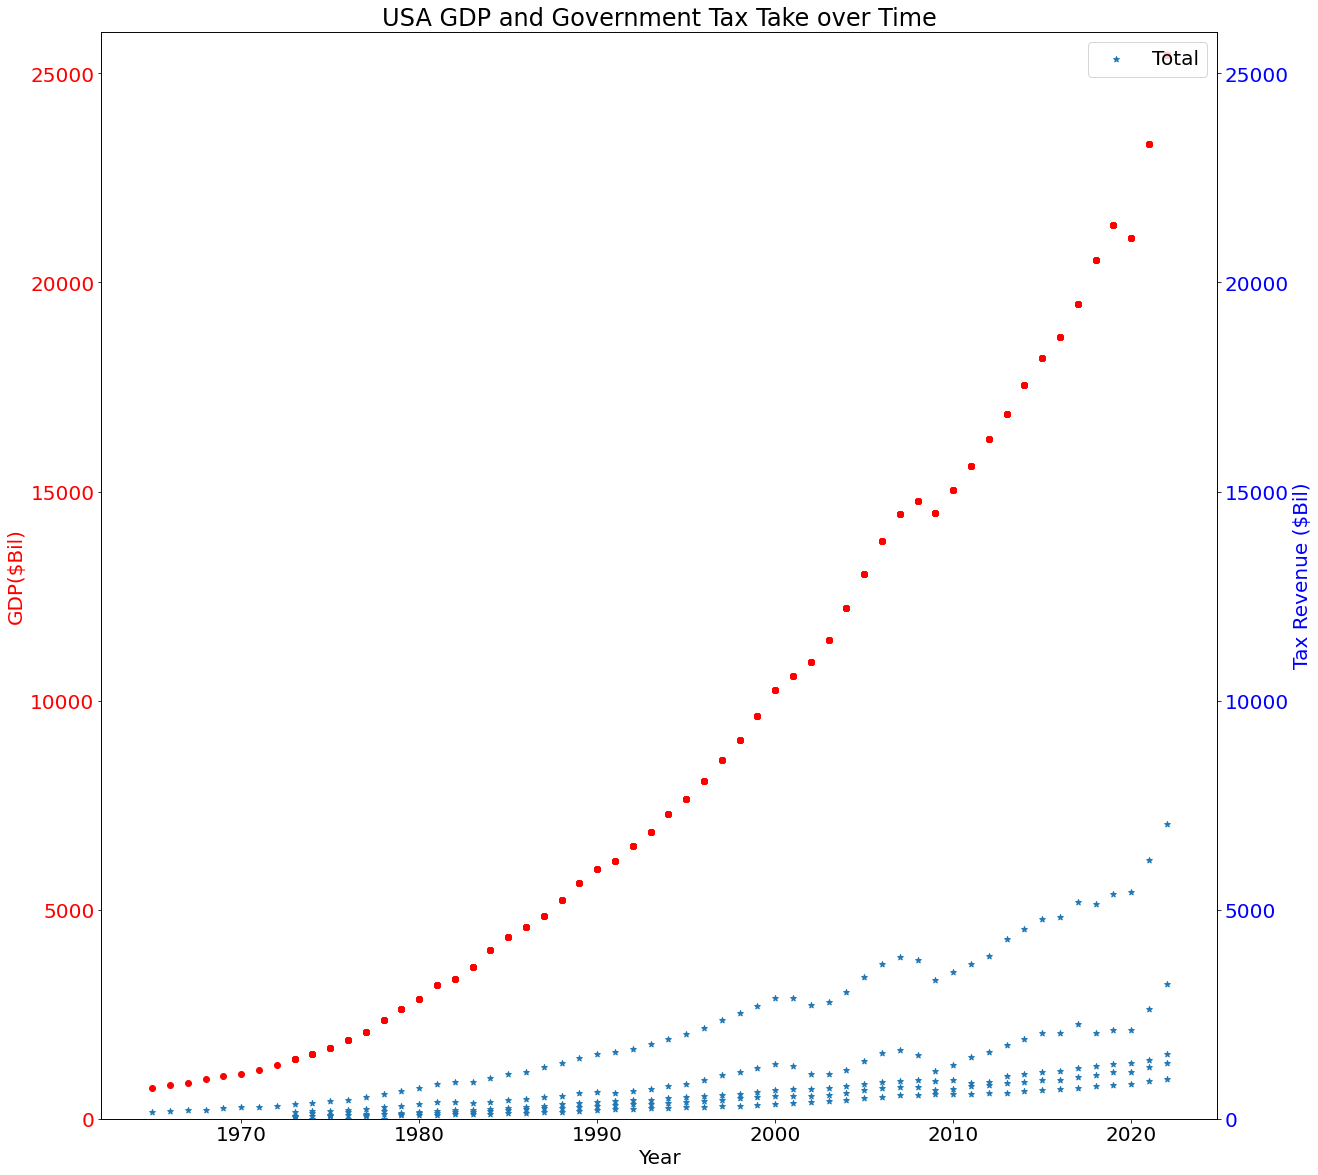

In [15]:
# Define Data

x = oecdtax_usgdp_df['Year']
data_1 = oecdtax_usgdp_df['GDP']
data_2 = oecdtax_usgdp_df['Value']
legend = oecdtax_usgdp_df['Level of government']
  
# Create Plot

fig, ax1 = plt.subplots() 
  
ax1.set_xlabel('Year') 
ax1.set_ylabel('GDP($Bil)', color = 'red') 
ax1.scatter(x, data_1, color = 'red') 
ax1.tick_params(axis ='y', labelcolor = 'red') 
  
# Adding Twin Axes

ax2 = ax1.twinx() 
  
ax2.set_ylabel('Tax Revenue ($Bil)', color = 'blue') 
ax2.scatter(x, data_2, marker = "*") 
ax2.tick_params(axis ='y', labelcolor = 'blue') 
 
# Set same axes scales

a,b = 0, 26000
ax1.set_ylim(a,b)
ax2.set_ylim(a,b)


plt.legend(legend)    
plt.title('USA GDP and Government Tax Take over Time')

# Show plot

plt.show()

This graph above shows how much tax the US government is taking out of the economy. It looks relatively uniform, as the GDP goes up, the tax revenue goes up. This makes sense. 

It would have been so much better if I had been able to divide the tax revenue data by government department in the legend, but it just wont happen. When I exclude "Total" it errors out and doesn't give me any graph.

I might actually have a look at Tax % of GDP, which the OECD data has that! No need to merge it with weird dataframes like the graph above. It was included in one of the graphs above, but it didn't provide insight as it the scale of the y-axis drowned the data out in the scale. 

In [16]:
oecdtax_usgpdpercent_df = df_oecdtax2.merge(usgdp_df, on='Year')
fedoecdtax_usgpdpercent_df = oecdtax_usgpdpercent_df.loc[(oecdtax_usgpdpercent_df['Country']=='United States') &
                                  #(oecdtax_usgpdpercent_df['Country']=='New Zealand')&
                                  (oecdtax_usgpdpercent_df['Value'] >= 0) & 
                                  (oecdtax_usgpdpercent_df['Level of government']=='Federal or Central government') & 
                                  (oecdtax_usgpdpercent_df['Year'] >= 0) & 
                                  (oecdtax_usgpdpercent_df['Indicator']=='Tax revenue as % of GDP') &
                                  (oecdtax_usgpdpercent_df['Tax revenue']=='Total tax revenue'),
                                  :]
stateoecdtax_usgpdpercent_df = oecdtax_usgpdpercent_df.loc[(oecdtax_usgpdpercent_df['Country']=='United States') &
                                  #(oecdtax_usgpdpercent_df['Country']=='New Zealand')&
                                  (oecdtax_usgpdpercent_df['Value'] >= 0) & 
                                  (oecdtax_usgpdpercent_df['Level of government']=='State/Regional') & 
                                  (oecdtax_usgpdpercent_df['Year'] >= 0) & 
                                  (oecdtax_usgpdpercent_df['Indicator']=='Tax revenue as % of GDP')&
                                  (oecdtax_usgpdpercent_df['Tax revenue']=='Total tax revenue') ,
                                  :]
socialoecdtax_usgpdpercent_df = oecdtax_usgpdpercent_df.loc[(oecdtax_usgpdpercent_df['Country']=='United States') &
                                  #(oecdtax_usgpdpercent_df['Country']=='New Zealand')&
                                  (oecdtax_usgpdpercent_df['Value'] >= 0) & 
                                  (oecdtax_usgpdpercent_df['Level of government']=='Social Security Funds') & 
                                  (oecdtax_usgpdpercent_df['Year'] >= 0) & 
                                  (oecdtax_usgpdpercent_df['Indicator']=='Tax revenue as % of GDP') &
                                  (oecdtax_usgpdpercent_df['Tax revenue']=='Total tax revenue'),
                                  :]
localoecdtax_usgpdpercent_df = oecdtax_usgpdpercent_df.loc[(oecdtax_usgpdpercent_df['Country']=='United States') &
                                  #(oecdtax_usgpdpercent_df['Country']=='New Zealand')&
                                  (oecdtax_usgpdpercent_df['Value'] >= 0) & 
                                  (oecdtax_usgpdpercent_df['Level of government']=='Local government') & 
                                  (oecdtax_usgpdpercent_df['Year'] >= 0) & 
                                  (oecdtax_usgpdpercent_df['Indicator']=='Tax revenue as % of GDP') &
                                  (oecdtax_usgpdpercent_df['Tax revenue']=='Total tax revenue'),
                                  :]
fedoecdtax_usgpdpercent_df

GOV            Level of government       TAX        Tax revenue  \
0      FED  Federal or Central government  TOTALTAX  Total tax revenue   
388    FED  Federal or Central government  TOTALTAX  Total tax revenue   
738    FED  Federal or Central government  TOTALTAX  Total tax revenue   
1126   FED  Federal or Central government  TOTALTAX  Total tax revenue   
1476   FED  Federal or Central government  TOTALTAX  Total tax revenue   
1864   FED  Federal or Central government  TOTALTAX  Total tax revenue   
2222   FED  Federal or Central government  TOTALTAX  Total tax revenue   
2630   FED  Federal or Central government  TOTALTAX  Total tax revenue   
3038   FED  Federal or Central government  TOTALTAX  Total tax revenue   
3446   FED  Federal or Central government  TOTALTAX  Total tax revenue   
3854   FED  Federal or Central government  TOTALTAX  Total tax revenue   
4262   FED  Federal or Central government  TOTALTAX  Total tax revenue   
4670   FED  Federal or Central government  TOTALTAX  Total tax revenue   
5078   FED  Federal or Central government  TOTALTAX  Total tax revenue   
5486   FED  Federal or Central government  TOTALTAX  Total tax revenue   
5898   FED  Federal or Central government  TOTALTAX  Total tax revenue   
6310   FED  Federal or Central government  TOTALTAX  Total tax revenue   
6722   FED  Federal or Central government  TOTALTAX  Total tax revenue   
7096   FED  Federal or Central government  TOTALTAX  Total tax revenue   
7470   FED  Federal or Central government  TOTALTAX  Total tax revenue   
7844   FED  Federal or Central government  TOTALTAX  Total tax revenue   
8218   FED  Federal or Central government  TOTALTAX  Total tax revenue   
8592   FED  Federal or Central government  TOTALTAX  Total tax revenue   
8966   FED  Federal or Central government  TOTALTAX  Total tax revenue   
9340   FED  Federal or Central government  TOTALTAX  Total tax revenue   
9714   FED  Federal or Central government  TOTALTAX  Total tax revenue   
10088  FED  Federal or Central government  TOTALTAX  Total tax revenue   
10462  FED  Federal or Central government  TOTALTAX  Total tax revenue   
10836  FED  Federal or Central government  TOTALTAX  Total tax revenue   
11210  FED  Federal or Central government  TOTALTAX  Total tax revenue   
11584  FED  Federal or Central government  TOTALTAX  Total tax revenue   
11958  FED  Federal or Central government  TOTALTAX  Total tax revenue   
12332  FED  Federal or Central government  TOTALTAX  Total tax revenue   
12706  FED  Federal or Central government  TOTALTAX  Total tax revenue   
13080  FED  Federal or Central government  TOTALTAX  Total tax revenue   
13454  FED  Federal or Central government  TOTALTAX  Total tax revenue   
13828  FED  Federal or Central government  TOTALTAX  Total tax revenue   
14202  FED  Federal or Central government  TOTALTAX  Total tax revenue   
14576  FED  Federal or Central government  TOTALTAX  Total tax revenue   
14950  FED  Federal or Central government  TOTALTAX  Total tax revenue   
15324  FED  Federal or Central government  TOTALTAX  Total tax revenue   
15698  FED  Federal or Central government  TOTALTAX  Total tax revenue   
16072  FED  Federal or Central government  TOTALTAX  Total tax revenue   
16446  FED  Federal or Central government  TOTALTAX  Total tax revenue   
16820  FED  Federal or Central government  TOTALTAX  Total tax revenue   
17198  FED  Federal or Central government  TOTALTAX  Total tax revenue   
17576  FED  Federal or Central government  TOTALTAX  Total tax revenue   
17954  FED  Federal or Central government  TOTALTAX  Total tax revenue   
18332  FED  Federal or Central government  TOTALTAX  Total tax revenue   
18710  FED  Federal or Central government  TOTALTAX  Total tax revenue   

          VAR                Indicator  COU        Country   YEA  Year  ...  \
0      TAXGDP  Tax revenue as % of GDP  USA  United States  1973  1973  ...   
388    TAXGDP  Tax revenue as % of GDP  USA  United States  1974  1974  ..

In [17]:
import plotly.graph_objects as go

# Add data
year1 = fedoecdtax_usgpdpercent_df['Year']
year2= stateoecdtax_usgpdpercent_df['Year']
year3= socialoecdtax_usgpdpercent_df['Year']
year4= localoecdtax_usgpdpercent_df['Year']
fedtax_percent_gdp = fedoecdtax_usgpdpercent_df['Value']
satetax_percent_gdp = stateoecdtax_usgpdpercent_df['Value']
socialtax_percent_gdp = socialoecdtax_usgpdpercent_df['Value']
localtax_percent_gdp = localoecdtax_usgpdpercent_df['Value']

fig = go.Figure()
# Create and style traces


fig.add_trace(go.Scatter(x=year1, y=fedtax_percent_gdp, name='Tax_percent of GDP',
                         line = dict(color='firebrick', width=4, dash='dot')))
fig.add_trace(go.Scatter(x=year2, y=satetax_percent_gdp, name = 'State Tax per GDP',
                         line=dict(color='royalblue', width=4, dash='dash')))
fig.add_trace(go.Scatter(x=year3, y=socialtax_percent_gdp, name = 'Social Sec Tax per GDP',
                         line=dict(color='orange', width=4, dash='dashdot')))
fig.add_trace(go.Scatter(x=year4, y=localtax_percent_gdp, name = 'Local Tax per GDP',
                         line=dict(color='black', width=4, dash='dot')))

# Edit the layout
fig.update_layout(title='FederalTax Take as Percentage of GDP in the USA',
                   xaxis_title='Year',
                   yaxis_title='Tax Take as % of USA GDP')


fig.show()

Pretty neat graph. You can make more numbers come out of it when you hover over the figures. 

You can also click on the legend it excludes that graph. Or includes it. Which is neat.

What does it show? Well, their taxes are quite low. All up they are taking 26% out of their economy. That is a lot more than what I assumed with my non-reference claim that their taxes were around the 15% mark. They are much higher, as this graph shows. 

I guess you could argue that their federal taxes are the ones that are quite low, around the 12% mark. So I could be half right. Half a thumbs up. 

## Pies.

I think it might be time for a pie. Also a pie graph. Maybe a few pie graphs. My intention here is to use the pie analogy, that when there is a bigger pie to be had, everyone gets a bigger slice. Hopefully I can make some pie graphs that I can modulate the size to show the size of economy... Maybe I'll also get a pie for lunch. 

There's a reference below about growing the econonmic pie. BLUF: Adam Smith (an economist, likely the first one) theorised in his book 'The Wealth of Nations' that if the wealth of the Nation grew, the wealth of all people poor and rich would increase through more employment and opportunities and so on. People starting using a pie analogy to explain this, that the pie would get bigger, and everyone gets a slice - at least there is a pie so to speak. 

The below pie might not be a round pie, but at least there is a pie. 

In [72]:
!pip install pywaffle

   ---------------------------------------- 25.6/25.6 MB 3.0 MB/s eta 0:00:00


In [82]:
df['Company'].value_counts()

Lockheed Martin                            17
Disney Experiences                         11
Comcast Corporation                         6
OPW                                         3
Penske Truck Leasing                        3
WALGREENS                                   3
Weatherford                                 2
NextEra                                     2
Markem-Imaje                                1
General Dynamics Information Technology     1
Rochester Institute of Technology           1
Name: Company, dtype: int64

In [50]:
from pywaffle import Waffle

data = df.Company.value_counts(normalize=True).mul(100).round(1).astype(int) 
fig = plt.figure(
    figsize=(40, 60), dpi=300,
    FigureClass=Waffle, 
    rows=5, 
    values=data, 
    colors=("#983D3D", "#232066", "#DCB732",'#00CC96', '#AB63FA', '#FFA15A', '#19D3F3', '#FF6692', '#B6E880', '#FF97FF', '#FECB52'),
    title={'label': 'Companies Looking For Workers in the USA', 'loc': 'left'},
    labels=["{0} ({1}%)".format(k, v) for k, v in data.items()],
    legend={'loc': 'best', 'bbox_to_anchor': (0.5, 2)}
)
fig.gca().set_facecolor('#EEEEEE')
fig.set_facecolor('#EEEEEE')
plt.show()

C:\Users\crump\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.canvas.print_figure(bytes_io, **kw)


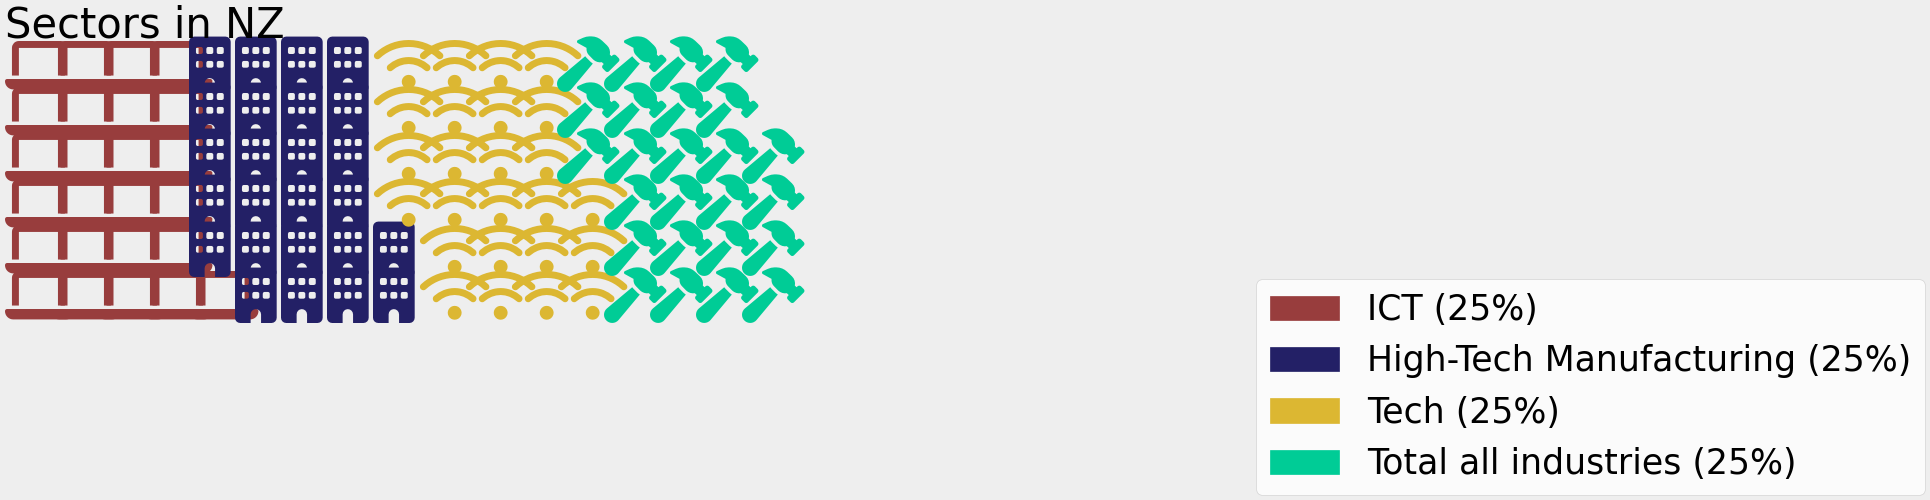

In [45]:
data = incomedf.Sector.value_counts(normalize=True).mul(100).round(1).astype(int) 
fig = plt.figure(
    figsize=(20, 20), dpi=50,
    FigureClass=Waffle, 
    rows=6, 
    values=data, 
    icons= ['laptop','building','wifi','hammer'],
    colors=("#983D3D", "#232066", "#DCB732",'#00CC96'),
    title={'label': 'Sectors in NZ', 'loc': 'left'},
    labels=["{0} ({1}%)".format(k, v) for k, v in data.items()],
    legend={
        'loc': 'best', 
        'bbox_to_anchor': (2.5, 0.2)
    }
)
fig.gca().set_facecolor('#EEEEEE')
fig.set_facecolor('#EEEEEE')
plt.show()

### Concatenation & House Keeping

Now it's time to concatenate the dataframes. 

After that, send the file to csv so I can use it in assignment 3. I could also run all the python code in this file to then use the dataframes in assignment 3, however I'm going to choose to do it in a simpler way that is faster for the computer. 



In [76]:
mergedf1= df.merge(
        df_oecdtax, 
        how='cross',
        )
mergedf1

Job Title  \
0                                  Senior Software Engineer   
1                                  Senior Software Engineer   
2                                  Senior Software Engineer   
3                                  Senior Software Engineer   
4                                  Senior Software Engineer   
...                                                     ...   
34984645  Software Developer, Staff - GMD Weapons System...   
34984646  Software Developer, Staff - GMD Weapons System...   
34984647  Software Developer, Staff - GMD Weapons System...   
34984648  Software Developer, Staff - GMD Weapons System...   
34984649  Software Developer, Staff - GMD Weapons System...   

                           Location  Salary Min  Salary Max          Company  \
0             De Pere, Brown County    91064.38    91064.38              OPW   
1             De Pere, Brown County    91064.38    91064.38              OPW   
2             De Pere, Brown County    91064.38    91064.38              OPW   
3             De Pere, Brown County    91064.38    91064.38              OPW   
4             De Pere, Brown County    91064.38    91064.38              OPW   
...                             ...         ...         ...              ...   
34984645  Priceville, Morgan County   121367.13   121367.13  Lockheed Martin   
34984646  Priceville, Morgan County   121367.13   121367.13  Lockheed Martin   
34984647  Priceville, Morgan County   121367.13   121367.13  Lockheed Martin   
34984648  Priceville, Morgan County   121367.13   121367.13  Lockheed Martin   
34984649  Priceville, Morgan County   121367.13   121367.13  Lockheed Martin   

            GOV Level of government       TAX                Tax revenue  \
0         SUPRA       Supranational  TOTALTAX          Total tax revenue   
1         SUPRA       Supranational  TOTALTAX          Total tax revenue   
2         SUPRA       Supranational  TOTALTAX          Total tax revenue   
3         SUPRA       Supranational  TOTALTAX          Total tax revenue   
4         SUPRA       Supranational  TOTALTAX          Total tax revenue   
...         ...                 ...       ...                        ...   
34984645  STATE      State/Regional        AH  Miscellaneous differences   
34984646  STATE      State/Regional        AH  Miscellaneous differences   
34984647  STATE      State/Regional        AH  Miscellaneous differences   
34984648  STATE      State/Regional        AH  Miscellaneous differences   
34984649  STATE      State/Regional        AH  Miscellaneous differences   

             VAR  ...  Year Unit Code        Unit  PowerCode Code  PowerCode  \
0         TAXGDP  ...  1995        PC  Percentage               0      Units   
1         TAXGDP  ...  1996        PC  Percentage               0      Units   
2         TAXGDP  ...  1997        PC  Percentage               0      Units   
3         TAXGDP  ...  1998        PC  Percentage               0      Units   
4         TAXGDP  ...  1999        PC  Percentage               0      Units   
...          ...  ...   ...       ...         ...             ...        ...   
34984645  TAXUSD  ...  2018       USD   US Dollar               9   Billions   
34984646  TAXUSD  ...  2019       USD   US Dollar               9   Billions   
34984647  TAXUSD  ...  2020       USD   US Dollar               9   Billions   
34984648  TAXUSD  ...  2021       USD   US Dollar               9   Billions   
34984649  TAXUSD  ...  2022       USD   US Dollar               9   Billions   

         Reference Period Code Reference Period  Value Flag Codes  Flags  
0                          NaN              NaN  0.176        NaN    NaN  
1                          NaN              NaN  0.206        NaN    NaN  
2                          NaN              NaN  0.206        NaN    NaN  
3                          NaN              NaN  0.208        NaN    NaN  
4                          NaN              NaN  0.180        NaN    NaN  
...     

In [80]:
csv_filename = 'mergedf1.csv'
mergedf1.to_csv(csv_filename, index=False)

In [82]:
#Here I am trying to merge the merged df, and the other non-merged df. It is possible to do it, but I don't have enough memory.
#I have run this code, and it had an error. I'm going to leave the merged df and csv as it is.
mergedf= mergedf1.merge(
        incomedf, 
        how='cross',
        )
mergedf

In [23]:
concatdf = pd.concat([df, df_oecdtax, incomedf], axis="columns")
concatdf

Job Title                       Location  \
0                  Senior Software Engineer          De Pere, Brown County   
1                       Software Engineer I  Reading Station, Berks County   
2                  Staff Software Architect  Reading Station, Berks County   
3                  Software Test Technician         Keene, Cheshire County   
4       Lead Software Engineer - Full Stack       Bannockburn, Lake County   
...                                     ...                            ...   
699688                                  NaN                            NaN   
699689                                  NaN                            NaN   
699690                                  NaN                            NaN   
699691                                  NaN                            NaN   
699692                                  NaN                            NaN   

        Salary Min  Salary Max               Company    GOV  \
0         91064.38    91064.38                   OPW  SUPRA   
1         73028.40    73028.40  Penske Truck Leasing  SUPRA   
2         85990.89    85990.89  Penske Truck Leasing  SUPRA   
3         71529.01    71529.01          Markem-Imaje  SUPRA   
4        184085.84   184085.84             WALGREENS  SUPRA   
...            ...         ...                   ...    ...   
699688         NaN         NaN                   NaN  STATE   
699689         NaN         NaN                   NaN  STATE   
699690         NaN         NaN                   NaN  STATE   
699691         NaN         NaN                   NaN  STATE   
699692         NaN         NaN                   NaN  STATE   

       Level of government       TAX                Tax revenue     VAR  ...  \
0            Supranational  TOTALTAX          Total tax revenue  TAXGDP  ...   
1            Supranational  TOTALTAX          Total tax revenue  TAXGDP  ...   
2            Supranational  TOTALTAX          Total tax revenue  TAXGDP  ...   
3            Supranational  TOTALTAX          Total tax revenue  TAXGDP  ...   
4            Supranational  TOTALTAX          Total tax revenue  TAXGDP  ...   
...                    ...       ...                        ...     ...  ...   
699688      State/Regional        AH  Miscellaneous differences  TAXUSD  ...   
699689      State/Regional        AH  Miscellaneous differences  TAXUSD  ...   
699690      State/Regional        AH  Miscellaneous differences  TAXUSD  ...   
699691      State/Regional        AH  Miscellaneous differences  TAXUSD  ...   
699692      State/Regional        AH  Miscellaneous differences  TAXUSD  ...   

       PowerCode Code PowerCode Reference Period Code  Reference Period  \
0                   0     Units                   NaN               NaN   
1                   0     Units                   NaN               NaN   
2                   0     Units                   NaN               NaN   
3                   0     Units                   NaN               NaN   
4                   0     Units                   NaN               NaN   
...               ...       ...                   ...               ...   
699688              9  Billions                   NaN               NaN   
699689              9  Billions                   NaN               NaN   
699690              9  Billions                   NaN               NaN   
699691              9  Billions                   NaN               NaN   
699692              9  Billions                   NaN               NaN   

        Value Flag Codes Flags  Sector  \
0       0.176        NaN   NaN     ICT   
1       0.206        NaN   NaN     ICT   
2       0.206        NaN   NaN     ICT   
3       0.208        NaN   NaN     ICT   
4       0.180        NaN   NaN     ICT   
...       ...        ...   ...     ...   
699688  0.000        NaN   NaN     NaN   
699689  0.000        NaN   NaN     NaN   
699690  0.000        NaN   NaN     NaN   
699691  0.000        NaN   NaN     NaN   
699692  0.000   

In [83]:
csv_filename = 'concatdf.csv'
concatdf.to_csv(csv_filename, index=False)

## EDA 

I feel I need to do some EDA. Maybe it will feed back into the loop that is needed for more insights. 

<AxesSubplot:>

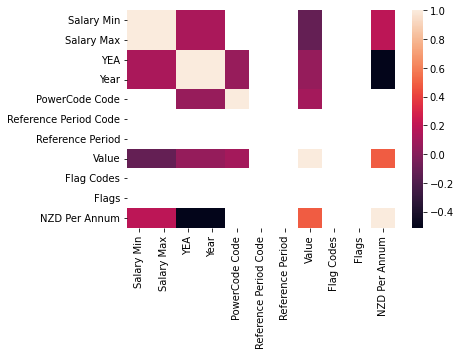

In [24]:
sns.heatmap(
    concatdf.corr(),
    )

Looking at this heatmap, there is not much to talk about. Yes, the most obvious are correlated, but there is nothing here that makes me want to go back and look at stuff again. 

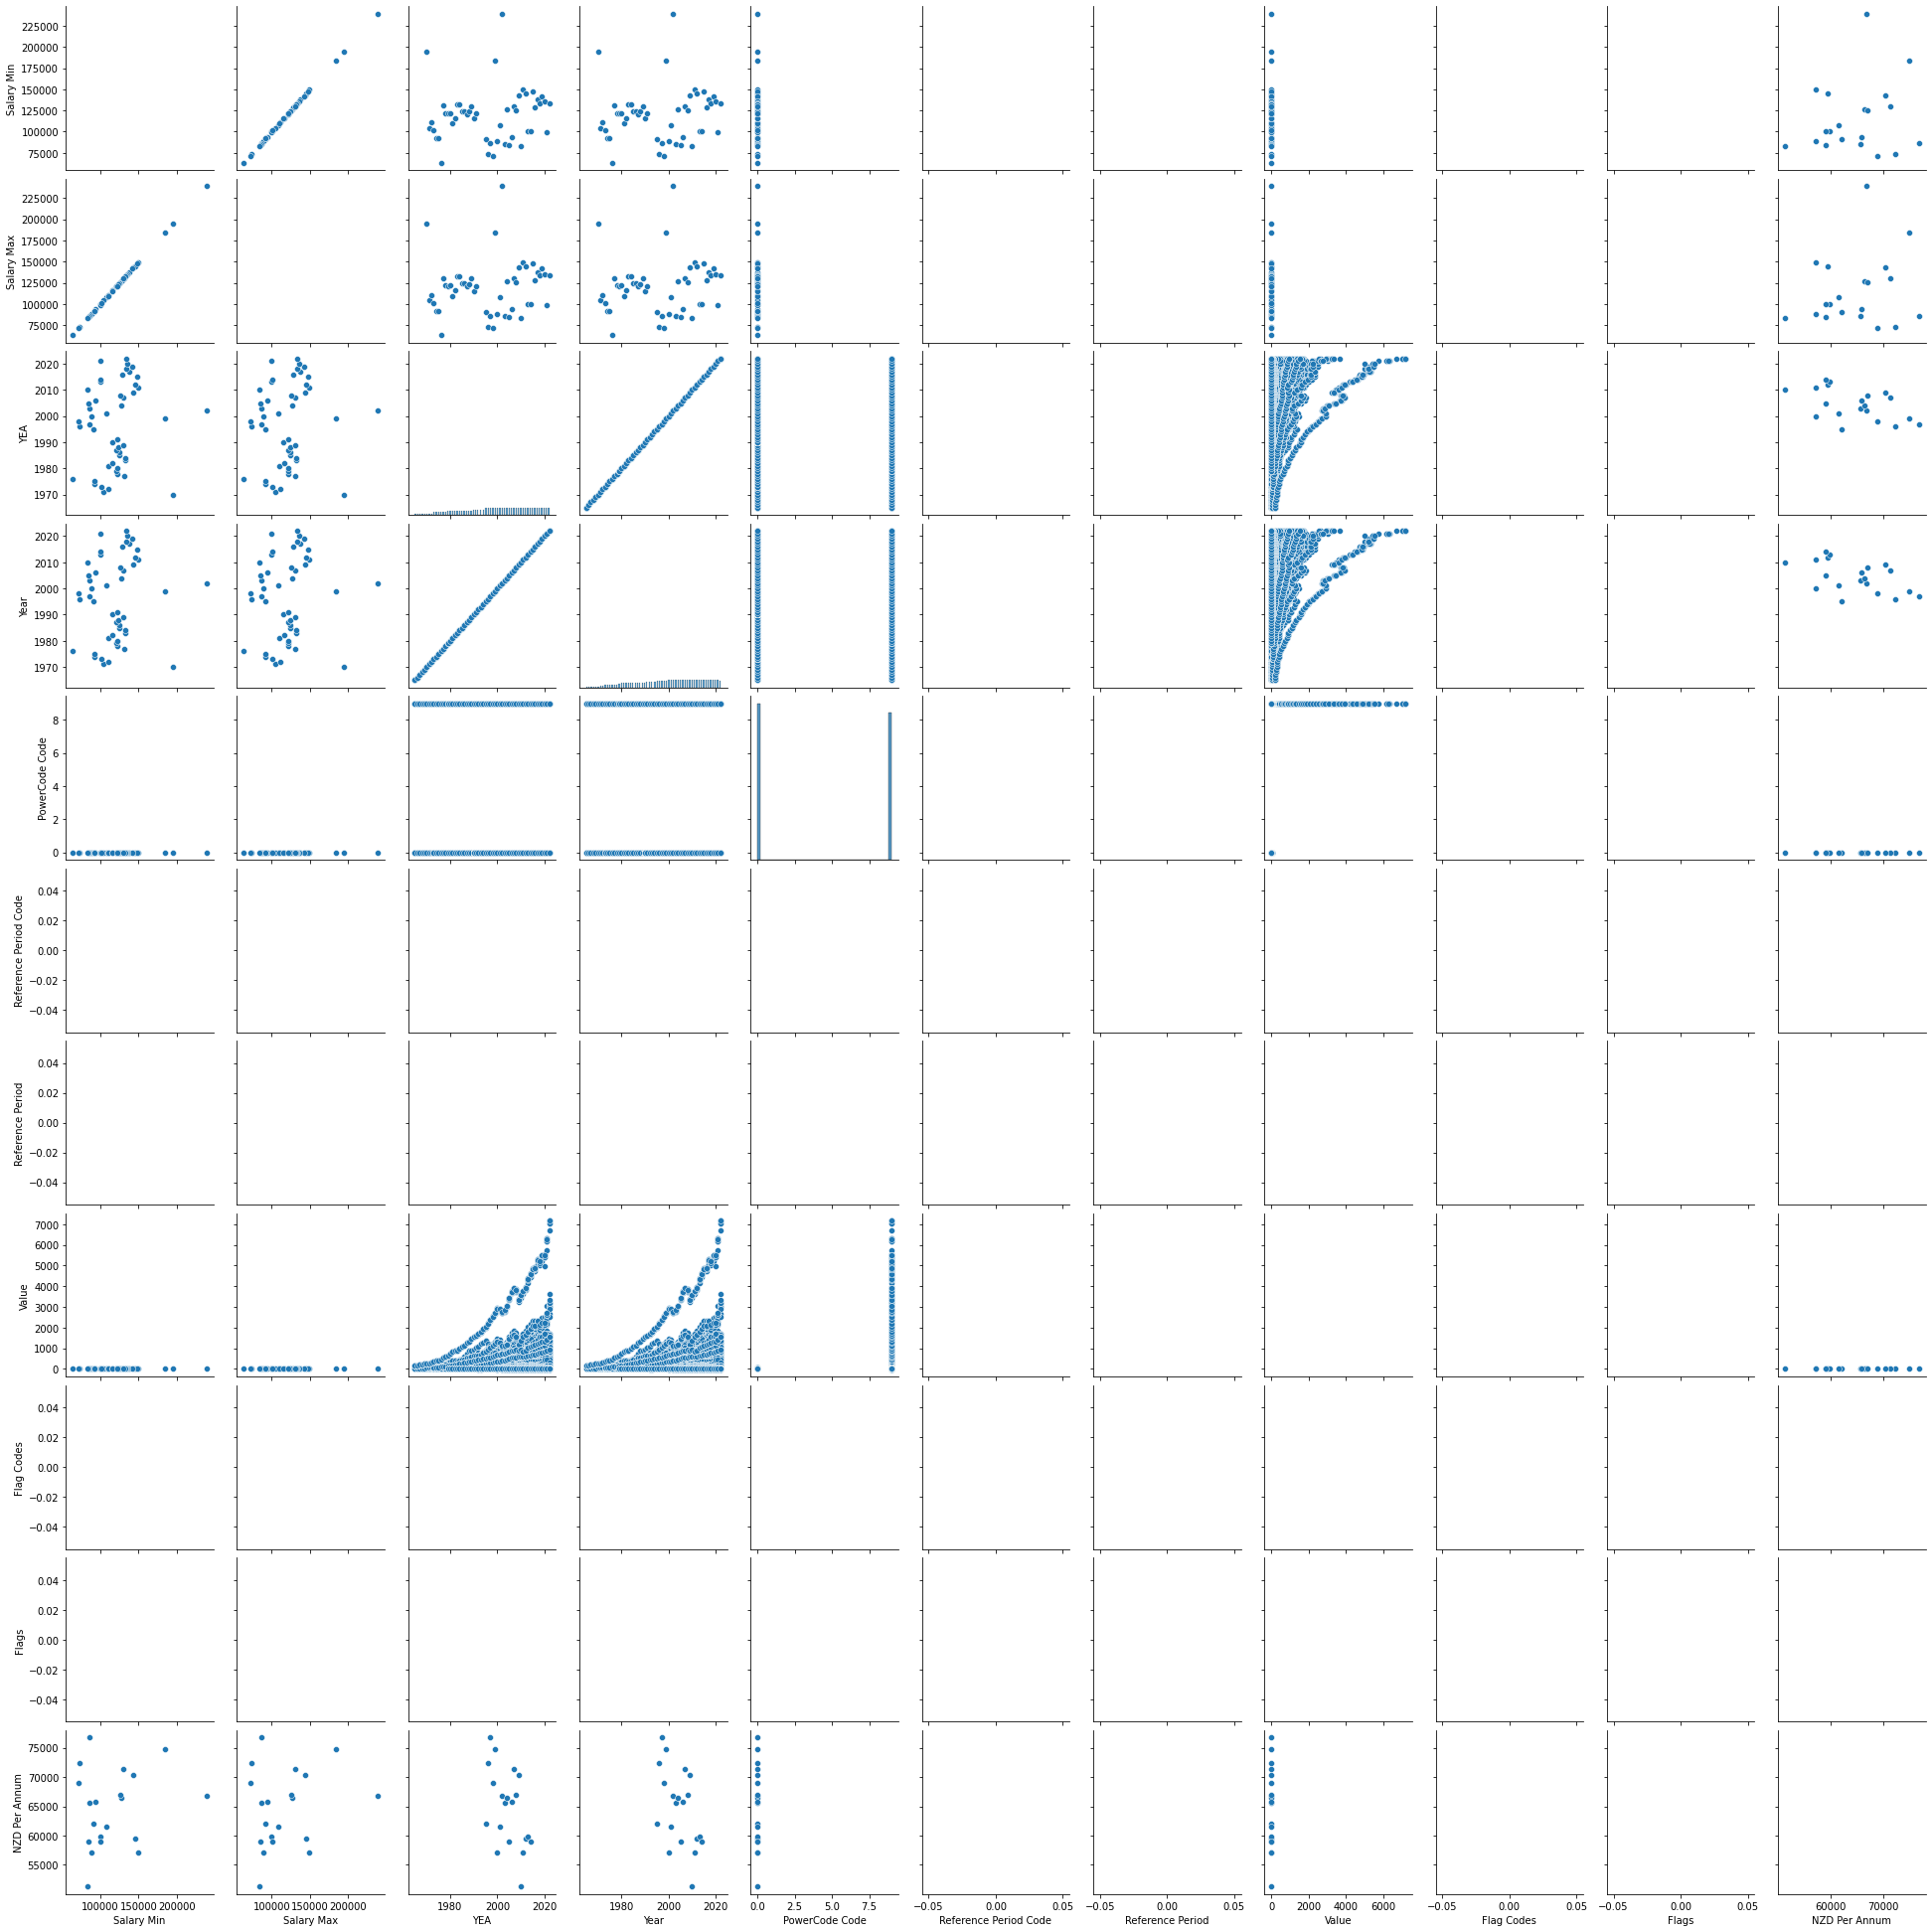

In [25]:
sns.pairplot(concatdf)

This graph does have some good insights. If you look at the Salary Max and Salary Min Scatter Graphs, you will see that there is some action in there. They both increase slightly over time. Interestingly, it is almost a tale of two cities, where there is top earners, middle income earners and low income earners, all increasing, but they seem to be diverging over time. Could this be from the top income earners creating more value for the economy over time and therefore being rewarded for the value they create? Would the low income earners incomes just be adjusting for inflation? I think these are questions that might need to be answered in a later study.

## Conclusion

As we have seen throughout, we have high taxes, and ok job prospects. 

Throughout the EDA, data cleaning and looking into what the data is telling us we have seen how much tax is being taken out of the US economy in varous forms from various organisations/levels of governement. We have seen how many jobs there are in many of the sectors. 

#### Data Wrangling
There has been data wrangling throughout this note book. I have concatenated, joined, got rid of strings, converted data types and more. The most data wrangling that is evident however is putting the data into new dataframes and/or lists that exclude parts of bigger dataframes to make it easier and more logical to plot. I have not found it nessecary to fillna, however I have done so in order to demonstrate that I can. 

### Key Findings

How does tax affect jobs in the USA and NZ?
It seems that the lower taxes may affect the amount of money paid in the different countries. Why is that? Well, as a shareholder I would want more margin in a higher tax paying country so that I can have a half-decent return on investment. So the higher the tax, the more margin the less jobs overall.  

Can we see better pay in NZ or the US?
No, the pay in the US is much higher. 

Does NZ have a good mix of jobs accross sectors?
I would say we have a good mix. We are probably missing a lot of tech jobs. If I was Prime Minister for the day, I would lower corporate taxes right down in order to attract some capital over here. Jobs will come from that, and demand for highly skilled workers. 


# References

Branson, Johannah & Lovell, Ca. (2000). Taxation and Economic Growth in New Zealand. 10.1007/978-1-4615-4433-3_3. 

https://www.nzherald.co.nz/business/we-have-exceeded-peak-taxation-richard-prebble/2HIAVCWUORDANFPD6P3H4NSAOI/

https://medium.com/@carstensavage/the-unofficial-guide-to-charles-schwabs-trader-apis-14c1f5bc1d57

https://www.geeksforgeeks.org/create-a-pandas-dataframe-from-lists/

https://figure.nz/chart/hdNat68mEUPexBqH

https://developer.adzuna.com/docs/search

https://stackoverflow.com/questions/55679381/pandas-how-to-load-data-from-nested-dictionary-into-dataframe

https://learn.microsoft.com/en-us/rest/api/azure/devops/wit/classification-nodes/get-classification-nodes?view=azure-devops-rest-5.0&tabs=HTTP#get_the_iteration_tree_with_2_levels_of_children

https://www.freecodecamp.org/news/what-is-an-api-and-how-to-test-it/

https://www.freecodecamp.org/news/build-consume-and-document-a-rest-api/

https://stackoverflow.com/questions/59867087/handle-nested-lists-in-pandas

https://www.geeksforgeeks.org/dataframe-to_excel-method-in-pandas/

https://stackoverflow.com/questions/54024504/reading-and-passing-excel-filename-with-pandas

https://stackoverflow.com/questions/55902150/whats-the-difference-between-app-id-and-app-key-on-most-open-platform

https://stackoverflow.com/questions/54087303/python-requests-how-to-check-for-200-ok

https://docs.clarifai.com/clarifai-basics/authentication/app-specific-api-keys/

https://www.privacy.org.nz/publications/statements-media-releases/new-zealand-part-of-global-effort-on-data-scraping/

https://stackoverflow.com/questions/7269678/why-is-app-access-token-different-to-appidsecret-now?rq=3

https://stackoverflow.com/questions/62758372/jupyter-notebook-not-opening-on-windows

https://www.oecd.org/tax/revenue-statistics-united-states.pdf

https://stats.oecd.org/Index.aspx?DataSetCode=REV#

https://realpython.com/pandas-plot-python/

https://stackoverflow.com/questions/28033046/matplotlib-scatter-color-by-categorical-factors

https://web.archive.org/web/20131213222255/http://www.financialpost.com/scripts/story.html?id=ef7d020d-9ae2-4839-beca-c7fbd1112cee

https://stackoverflow.com/questions/42382263/valueerror-length-of-values-does-not-match-length-of-index-pandas-dataframe-u

https://stackoverflow.com/questions/59644751/show-both-value-and-percentage-on-a-pie-chart

https://stackoverflow.com/questions/63460213/how-to-define-colors-in-a-figure-using-plotly-graph-objects-and-plotly-express

https://stackoverflow.com/questions/332289/how-do-i-change-the-size-of-figures-drawn-with-matplotlib

https://stackoverflow.com/questions/41400136/how-to-do-waffle-charts-in-python-square-piechart

https://pywaffle.readthedocs.io/en/latest/examples/plot_with_characters_or_icons.html

https://fontawesome.com/

https://www.statology.org/pandas-value_counts-percentage/#:~:text=counts%20%3D%20df.my_col.value_counts%28%29%20percs%20%3D,df.my_col.value_counts%28normalize%3DTrue%29%20pd.concat%28%5Bcounts%2Cpercs%5D%2C%20axis%3D1%2C%20keys%3D%5B%27count%27%2C%20%27percentage%27%5D%29

https://stackoverflow.com/questions/36921951/truth-value-of-a-series-is-ambiguous-use-a-empty-a-bool-a-item-a-any-o

https://www.geeksforgeeks.org/how-to-concatenate-two-or-more-pandas-dataframes/

https://stackoverflow.com/questions/69532422/mergeerror-can-not-pass-on-right-on-left-on-or-set-right-index-true-or-left-i

https://realpython.com/pandas-merge-join-and-concat/#how-to-use-join

https://stackoverflow.com/questions/69717154/typeerror-cannot-concatenate-object-of-type-class-list-only-series-and-d

https://www.macrotrends.net/global-metrics/countries/USA/united-states/gdp-gross-domestic-product#:~:text=U.S.%20gdp%20for%202022%20was%20%2425%2C439.70B%2C%20a%209.11%25,2019%20was%20%2421%2C380.98B%2C%20a%204.13%25%20increase%20from%202018.

https://stackoverflow.com/questions/38516481/trying-to-remove-commas-and-dollars-signs-with-pandas-in-python

https://pythonguides.com/matplotlib-two-y-axes/

https://stackoverflow.com/questions/38234115/pandas-matplotlib-pyplot-add-legend-by-a-column-value

https://matplotlib.org/stable/users/explain/colors/colors.html
    
https://plotly.com/python/line-charts/#connect-data-gaps

https://stackoverflow.com/questions/11315641/plotting-a-histogram-with-a-function-line-on-top

https://www.geeksforgeeks.org/matplotlib-pyplot-hist-in-python/